# Exploring the 20 Newsgroups Dataset With Text Analysis Algorithms

Importing 20 newsgroups data

In [32]:
import numpy as np
import matplotlib.pyplot as plt


In [33]:
from sklearn.datasets import fetch_20newsgroups


downloading the data

The data contains approximately 20,000 across 20 online newsgroups

The 20 different newsgroups are:
* comp.graphics
* comp.os.ms-windows.misc
* comp.sys.mac.hardware
* comp.windows.x
* rec.autos
* rec.motorcycles
* rec.sport.baseball
* rec.sport.hockey
* sci.crypt
* sci.med
* sci.space
* misc.forsale
* talk.politics.misc
* talk.polotics.guns
* talk.religion.misc
* alt.atheism
* soc.religion.christian


In [34]:
groups = fetch_20newsgroups()


The data objects in the form of key values:

In [35]:
groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

 Newsgroups names

In [36]:
groups['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

The target key encoded as integer:

In [37]:
groups.target

array([7, 4, 4, ..., 3, 1, 8])

In [38]:
np.unique(groups.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

Checking the first document

In [39]:
groups.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [40]:
groups.target[0]

7

In [41]:
print("The first document is")
groups.target_names[groups.target[0]]

The first document is


'rec.autos'

In [42]:
len(groups.data[0])

721

In [43]:
len(groups.data[1])

858

# Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


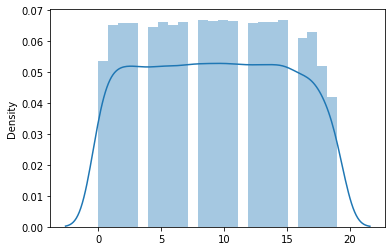

In [44]:
import seaborn as sns
sns.distplot(groups.target)

Histogram of the 500 highest word counts

In [45]:
from sklearn.feature_extraction.text import CountVectorizer


In [46]:
cv = CountVectorizer(stop_words="english", max_features=500)
transformed = cv.fit_transform(groups.data)

In [47]:
print(cv.get_feature_names())

['00', '000', '0d', '0t', '10', '100', '11', '12', '13', '14', '145', '15', '16', '17', '18', '19', '1993', '1d9', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '34u', '35', '40', '45', '50', '55', '80', '92', '93', '__', '___', 'a86', 'able', 'ac', 'access', 'actually', 'address', 'ago', 'agree', 'al', 'american', 'andrew', 'answer', 'anybody', 'apple', 'application', 'apr', 'april', 'area', 'argument', 'armenian', 'armenians', 'article', 'ask', 'asked', 'att', 'au', 'available', 'away', 'ax', 'b8f', 'bad', 'based', 'believe', 'berkeley', 'best', 'better', 'bible', 'big', 'bike', 'bit', 'black', 'board', 'body', 'book', 'box', 'buy', 'ca', 'california', 'called', 'came', 'canada', 'car', 'card', 'care', 'case', 'cause', 'cc', 'center', 'certain', 'certainly', 'change', 'check', 'children', 'chip', 'christ', 'christian', 'christians', 'church', 'city', 'claim', 'clinton', 'clipper', 'cmu', 'code', 'college', 'color', 'colorado', 'columbia', '

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


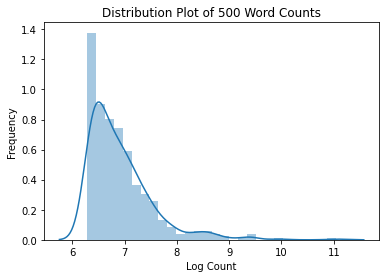

In [48]:
sns.distplot(np.log(transformed.toarray (). sum(axis=0)))
plt.xlabel('Log Count')
plt.ylabel('Frequency')
plt.title('Distribution Plot of 500 Word Counts')
plt.show()

# Data Preprocessing

Applying Filtering

In [49]:
import nltk
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer

In [50]:
def letters_only(astr):
  return astr.isalpha()

In [51]:
cv=CountVectorizer(stop_words="english", max_features=500)

In [52]:
groups = fetch_20newsgroups()

In [53]:
cleaned =[]

In [54]:
nltk.download("names")

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


True

In [64]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [55]:
all_names=set(names.words())

In [65]:

lemmatizer = WordNetLemmatizer()

In [66]:
for post in groups.data:
  cleaned.append(' '.join([lemmatizer.lemmatize(word.lower())
  for word in post.split()
  if letters_only(word)
  and word not in all_names]))

In [67]:
transformed = cv.fit_transform(cleaned)

Obtained features

In [68]:
print(cv.get_feature_names())

['able', 'accept', 'access', 'according', 'act', 'action', 'actually', 'add', 'address', 'ago', 'agree', 'algorithm', 'allow', 'american', 'anonymous', 'answer', 'anybody', 'apple', 'application', 'apr', 'arab', 'area', 'argument', 'armenian', 'article', 'ask', 'asked', 'assume', 'atheist', 'attack', 'attempt', 'available', 'away', 'bad', 'based', 'basic', 'belief', 'believe', 'best', 'better', 'bible', 'big', 'bike', 'bit', 'black', 'board', 'body', 'book', 'box', 'build', 'bus', 'business', 'buy', 'ca', 'california', 'called', 'came', 'car', 'card', 'care', 'carry', 'case', 'cause', 'center', 'certain', 'certainly', 'chance', 'change', 'check', 'child', 'chip', 'christian', 'church', 'city', 'claim', 'clear', 'clipper', 'code', 'college', 'color', 'come', 'coming', 'command', 'comment', 'common', 'communication', 'company', 'computer', 'computing', 'consider', 'considered', 'contact', 'control', 'controller', 'copy', 'correct', 'cost', 'country', 'couple', 'course', 'cover', 'create'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Clustering

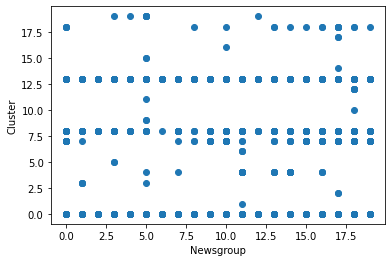

In [82]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
km = KMeans(n_clusters=20)
km.fit(transformed)
labels = groups.target
plt.scatter(labels, km.labels_)
plt.xlabel('Newsgroup')
plt.ylabel('Cluster')
plt.show()



# Topic Modelling with Non-negative matrix factorization (NMF)

In [83]:
from sklearn.decomposition import NMF

In [84]:
nmf = NMF(n_components=100, random_state=43).fit(transformed)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


In [85]:
for topic_idx, topic in enumerate(nmf.components_):
  label = '{}: '.format(topic_idx)
  print(label," ".join([cv.get_feature_names()[i]
                        for i in topic.argsort()[:-9:-1]]))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


0:  wa thought later took left order seen taken
1:  db bit data place stuff add time line
2:  server using display screen support code mouse application
3:  file section information write source change entry number
4:  disk drive hard controller support card board head
5:  entry rule program source number info email build
6:  new york sale change service result study early
7:  image software user package using display include support
8:  window manager application using offer user information course
9:  gun united control house american second national issue
10:  hockey league team game division player list san
11:  turkish government sent war study came american world
12:  program change technology display information version application rate
13:  space nasa technology service national international small communication
14:  government political federal sure free private local country
15:  output line open write read return build section
16:  people country doing tell live killed lot s

*Referrence: Python machine learning By Example- Yuxi (Hayden) Liu*  